# Практическое задание № 2. Нейронные сети


**Работу выполнил (а):**

Идрисова Лена Рустемовна, 368234

## Прогнозирование цены на жилье с помощью нейросетевой регрессионной модели

Необходимо по имеющимся данным о ценах на жильё предсказать окончательную цену каждого дома с учетом характеристик домов с использованием нейронной сети. Описание набора данных  содержит 80 классов (набор переменых) классификации оценки типа жилья, и находится в файле `data_description.txt`.

В работе требуется дополнить раздел «Моделирование» в подразделе «Построение и обучение модели» создать и инициализировать последовательную модель нейронной сети с помощью фрэймворков тренировки нейронных сетей как: Torch или Tensorflow. Скомпилировать нейронную сеть выбрав функцию потерь и оптимизатор соответственно. Оценить точность полученных результатов. Вывести предсказанные данные о продаже. 


### Импорт библиотек
Импортируем необходимые библиотеки:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

KeyboardInterrupt: 

### Считываем набор данных


Загрузим набор данных и присвоим следующими переменные:

* `train_data`: данные, используемые для обучения модели
* `test_data`: данные, используемые для проверки модели

In [505]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

## Подготовка данных
### Отобразим обучающие и проверочные данные:

In [506]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [507]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Как можно видеть, `train_data` имеет на один столбец больше, чем `test_data`, это столбец `SalePrice`, для обучения модели перед применением ее для предсказания меток в test_data.

### Проверяем нет ли тестовые данные пустых значений значений (Nan)

Построим функцию `def missing_value_checker` для проверки и подсчёта пропущеных значений в test_data. А также выведем тип данных этих значений.


In [508]:
def missing_value_checker(data):
    list = []
    for feature, content in data.items():
        if data[feature].isnull().values.any():
            
            sum = data[feature].isna().sum()

            type = data[feature].dtype

            print (f'{feature}: {sum}, type: {type}')
            
            list.append(feature)
    print(list)

    print(len(list))

missing_value_checker(test_data)

MSZoning: 4, type: object
LotFrontage: 227, type: float64
Alley: 1352, type: object
Utilities: 2, type: object
Exterior1st: 1, type: object
Exterior2nd: 1, type: object
MasVnrType: 894, type: object
MasVnrArea: 15, type: float64
BsmtQual: 44, type: object
BsmtCond: 45, type: object
BsmtExposure: 44, type: object
BsmtFinType1: 42, type: object
BsmtFinSF1: 1, type: float64
BsmtFinType2: 42, type: object
BsmtFinSF2: 1, type: float64
BsmtUnfSF: 1, type: float64
TotalBsmtSF: 1, type: float64
BsmtFullBath: 2, type: float64
BsmtHalfBath: 2, type: float64
KitchenQual: 1, type: object
Functional: 2, type: object
FireplaceQu: 730, type: object
GarageType: 76, type: object
GarageYrBlt: 78, type: float64
GarageFinish: 78, type: object
GarageCars: 1, type: float64
GarageArea: 1, type: float64
GarageQual: 78, type: object
GarageCond: 78, type: object
PoolQC: 1456, type: object
Fence: 1169, type: object
MiscFeature: 1408, type: object
SaleType: 1, type: object
['MSZoning', 'LotFrontage', 'Alley', 'Ut

Проверяем какие признаки в таблице можно оставить, а какие удалить. Если пропущенных значений слишком много, то удалим признак. Если их небольшое количество, то заполним `mean` или `median` для чисел, новая категория `missing` для строковых объектов.

В соответствии с этим:

– удалим ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'];

– заполним числовое отсутствующее значение значением `mean`;

– заполним строковое отсутствующее значение значением `missing`.

In [509]:
test_edited = test_data.drop(['Alley','FireplaceQu','PoolQC', 'Fence', 'MiscFeature'], axis=1)
train_edited = train_data.drop(['Alley','FireplaceQu','PoolQC', 'Fence', 'MiscFeature'], axis=1)

def nan_filler(data):
    for label, content in data.items():
        if pd.api.types.is_numeric_dtype(content):
            data[label] = content.fillna(content.median())
        else:
            data[label] = content.astype("category").cat.as_ordered()
            data[label] = pd.Categorical(content).codes+1

nan_filler(test_edited)
nan_filler(train_edited)

### Перепроверим наши данные:

In [510]:
missing_value_checker(test_edited)

[]
0


In [511]:
missing_value_checker(train_edited)

[]
0


In [512]:
train_edited.shape, test_edited.shape

((1460, 76), (1459, 75))

In [513]:
test_edited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   int8   
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   int8   
 6   LotShape       1459 non-null   int8   
 7   LandContour    1459 non-null   int8   
 8   Utilities      1459 non-null   int8   
 9   LotConfig      1459 non-null   int8   
 10  LandSlope      1459 non-null   int8   
 11  Neighborhood   1459 non-null   int8   
 12  Condition1     1459 non-null   int8   
 13  Condition2     1459 non-null   int8   
 14  BldgType       1459 non-null   int8   
 15  HouseStyle     1459 non-null   int8   
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [514]:
train_edited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int8   
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int8   
 6   LotShape       1460 non-null   int8   
 7   LandContour    1460 non-null   int8   
 8   Utilities      1460 non-null   int8   
 9   LotConfig      1460 non-null   int8   
 10  LandSlope      1460 non-null   int8   
 11  Neighborhood   1460 non-null   int8   
 12  Condition1     1460 non-null   int8   
 13  Condition2     1460 non-null   int8   
 14  BldgType       1460 non-null   int8   
 15  HouseStyle     1460 non-null   int8   
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### Разделим данные

Поскольку мы не знаем метку (Цена) тестовых данных, для оценки модели, чтобы получить лучшую модель перед прогнозированием тестовых данных, разделим данные в файле train.scv на обучающие и проверочные данные, соотношение составляет 20%.

In [515]:
X = train_edited.drop('SalePrice', axis=1)
y = train_edited['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

In [516]:
X_train.shape, test_edited.shape

((1168, 75), (1459, 75))

## Моделирование

### Построение и обучение модели


Создайте последовательную модель нейронной сети с помощью фрэймворков тренировки нейронных сетей как: Torch или Tensorflow. 

In [517]:

tf.random.set_seed(40) #Для обеспечения воспроизводимости результатов устанавливается функция seed

# Создание последовательной модели
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Входной полносвязный слой с 64 нейронами
    layers.Dense(64, activation='relu'),                                   # Скрытый полносвязный слой с 64 нейронами
    layers.Dense(1)                                                       # Выходной слой с 1 нейроном (для регрессии)
])

C:\Users\moonl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Скомпилируйте нейронную сеть, выбрав функцию потерь и оптимизатор соответственно.

In [518]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

Обучите модель на обучающих данных `X_train` и `y_train` задав гиперпараметры вашей модели нейронной сети, например количество эпох (epochs), размер мини-выборки (batch_size) и другие.

In [519]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), batch_size=32)

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 37951741952.0000 - mae: 179111.8750 - val_loss: 35920781312.0000 - val_mae: 175226.2031
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 33524021248.0000 - mae: 167034.2500 - val_loss: 24902328320.0000 - val_mae: 141966.6406
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20290467840.0000 - mae: 122992.2891 - val_loss: 11245732864.0000 - val_mae: 74585.8438
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6962804736.0000 - mae: 55225.9727 - val_loss: 10238393344.0000 - val_mae: 52171.1523
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5038134784.0000 - mae: 46659.1914 - val_loss: 8546869248.0000 - val_mae: 50188.3242
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4508646912.0000 - mae: 45199.8633 - val_loss: 7330196480.0000 - val_mae: 48598.9531
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4097182464.0000 - mae: 44090.2500 - val_loss: 6409734656.0000 - val_mae

**Оцените полученные результаты**

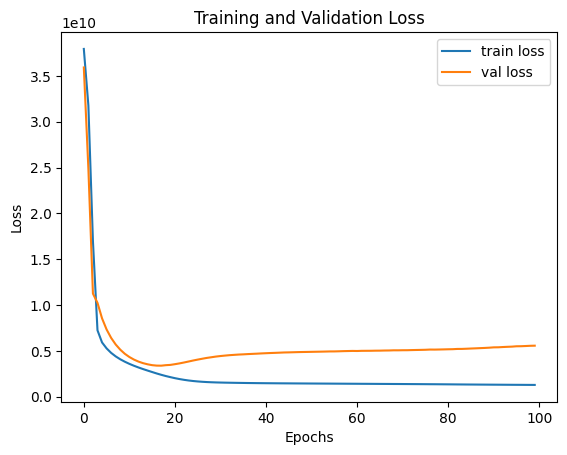

{'loss': [37944184832.0, 31775533056.0, 16962016256.0, 7241184256.0, 5916554752.0, 5267139584.0, 4776974336.0, 4393818624.0, 4079652352.0, 3814246400.0, 3580398336.0, 3373844224.0, 3185858304.0, 3011791360.0, 2847711488.0, 2688348928.0, 2530714624.0, 2385230080.0, 2250519808.0, 2131173888.0, 2018586624.0, 1921290240.0, 1837055616.0, 1765848320.0, 1707826688.0, 1661502720.0, 1623841152.0, 1594022016.0, 1571918464.0, 1554407424.0, 1541112576.0, 1529563776.0, 1520408960.0, 1511906432.0, 1504020096.0, 1496779520.0, 1489481088.0, 1483756032.0, 1477797248.0, 1472635264.0, 1468128256.0, 1464090752.0, 1460162560.0, 1456218752.0, 1453058432.0, 1450290304.0, 1446614912.0, 1443840640.0, 1440946816.0, 1437811072.0, 1434773888.0, 1432167680.0, 1429440384.0, 1426567552.0, 1424067072.0, 1421035136.0, 1418240768.0, 1415368192.0, 1412391296.0, 1409456640.0, 1407056640.0, 1403328512.0, 1401349504.0, 1398273024.0, 1395299712.0, 1392343936.0, 1389655168.0, 1387124992.0, 1383545472.0, 1381479296.0, 1378425

In [520]:
# Построение графика истории обучения
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

print(history.history)


### Прогнозирование

In [521]:
# Предсказание цен на тестовых данных
preds = model.predict(test_edited)

# Вывод предсказанных данных
output = pd.DataFrame({
    'Id': test_data['Id'],
    'SalePrice': np.squeeze(preds)
})
print(output)

output.to_csv('submission.csv', index=False)

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
        Id      SalePrice
0     1461  152704.562500
1     1462   99079.289062
2     1463  196675.359375
3     1464  194781.453125
4     1465  171355.390625
...    ...            ...
1454  2915   87761.070312
1455  2916  110625.429688
1456  2917  204069.359375
1457  2918  100786.476562
1458  2919  238995.296875

[1459 rows x 2 columns]


## Отчет

Рассмотрим как меняются графики ошибок при изменении количества нейронов на входном слое:

* Количество нейронов на входном слое - 32, 64, 128, 512
* Количество нейронов на скрытом слое - 32
* Количество эпох - 50
* Размер мини-выборки - 16
* Оптимизатор - adam
* Функция потерь - mse

Вывод: при увеличении количсетва нейронов на входном слое функция потерь стремительнее становится меньше, но если переборщить, то ошибка наоборот начинает возрастать (переобучение) как случилось при 512 нейронах на входном слое

![alt text](32.32.16.adam.mse.50.png)
![alt text](64.32.16.adam.mse.50.png) 
![alt text](128.32.16.adam.mse.50.png)
![alt text](512.32.png)

Рассмотрим как меняются графики ошибок при изменении количества нейронов на скрытом слое:

* Количество нейронов на входном слое - 32
* Количество нейронов на скрытом слое - 32, 64, 128, 512
* Количество эпох - 50
* Размер мини-выборки - 16
* Оптимизатор - adam
* Функция потерь - mse

Вывод: при увеличении количсетва нейронов на скрытом слое функция потерь стремительнее становится меньше, но если переборщить, то ошибка наоборот начинает возрастать (переобучение) как случилось при 512 нейронах на скрытом слое

![alt text](32.32.16.adam.mse.50.png)
![alt text](32.64.png)
![alt text](32.128.png)
![alt text](32.512.png)

Рассмотрим как меняются графики ошибок при изменении количества эпох:

* Количество нейронов на входном слое - 32
* Количество нейронов на скрытом слое - 32
* Количество эпох - 50, 100, 200, 500
* Размер мини-выборки - 16
* Оптимизатор - adam
* Функция потерь - mse

Вывод: при увеличении количсетва эпох функция потерь стремительнее становится меньше, но если переборщить, то ошибка наоборот начинает возрастать (переобучение), это видно на последнем графике, если приглядеться то видно что ошибка идет не сильной, но волной

![alt text](32.32.16.adam.mse.50.png)
![alt text](32.32.100.png)
![alt text](32.32.200.png)
![alt text](32.32.500.png)

Рассмотрим как меняются графики ошибок при изменении размера мини-выборки:

* Количество нейронов на входном слое - 32
* Количество нейронов на скрытом слое - 32
* Размер мини-выборки - 16, 32, 64, 256
* Количество эпох - 50
* Оптимизатор - adam
* Функция потерь - mse

Вывод: при увеличении размера мини-выборки функция потерь стремительнее становится меньше, но уже при 32 видно небольшой бугорок в начале, который увеличивается с увеличением мини-выборки. При 64 и 256 видно как значение потери около 0.5 при 10 и 30 эпохах соответсвенно.

![alt text](32.32.16.adam.mse.50.png)
![alt text](32.32.50.32.png)
![alt text](32.32.50.64.png)
![alt text](32.32.50.256.png)

Рассмотрим как меняются графики ошибок при изменении оптимизатора:

* Количество нейронов на входном слое - 32
* Количество нейронов на скрытом слое - 32
* Размер мини-выборки - 16, 32, 64, 256
* Количество эпох - 50
* Оптимизатор - adam, sgd, rmsprop
* Функция потерь - mse

Вывод: лучше всего работает adam, при sgd все значения нулевые, при rmsprop функция потерь стремится к меньшему значению, но не так стремительно как при adam

![alt text](32.32.16.adam.mse.50.png)
![alt text](sgd.png)
![alt text](rmsprop.png)

Рассмотрим как меняются графики ошибок при изменении функции потерь:

* Количество нейронов на входном слое - 32
* Количество нейронов на скрытом слое - 32
* Размер мини-выборки - 16, 32, 64, 256
* Количество эпох - 50
* Оптимизатор - adam
* Функция потерь - mse, mae

Вывод: лучше работает mse, при mae функция потерь стремится к меньшему значению, но не так стремительно как при mse

![alt text](32.32.16.adam.mse.50.png)
![alt text](mae.png)

### Общие выводы

Рассмотрев разные значения параметров, я выбрала наиболее оптимальные для данного датасета:

* Количество нейронов на входном слое - 64
* Количество нейронов на скрытом слое - 64
* Размер мини-выборки - 32
* Количество эпох - 100
* Оптимизатор - adam
* Функция потерь - mse

Также по графикам можно заметить, что при изменении параметров меняется функция потерь только от валидационных данных

## Вопросы:

**Как выше перечисленные параметры влияют на полученный вами результат?**

*   Увеличение количества нейронов может улучшить способность модели обрабатывать сложные данные, но также может привести к переобучению.
*   Увеличение количества эпох позволяет модели лучше адаптироваться, но может вызвать переобучение.
*   Слишком большая или слишком маленькая размерность мини-выборки влияет на скорость обучения и вариативность обновлений весов.
*   Разные функции потерь и оптимизаторы по-разному влияют на схождение модели, быстрое или медленное, поэтому выбор важен.

**Что такое эпоха (Epoch)? В чем отличие от итерации (Iteration)?**

*   Эпоха — это полный проход по всему обучающему набору данных. Итерация — это один шаг обновления весов модели, который происходит, когда модель обучается на небольшом наборе данных (батче).

**Что такое функция активации? Какие вам известны? Как и зачем используются в нейронной сети?**

*   Функция активации — это функция, которая определяет выход нейрона на основе входных данных.Примеры функций активации: ReLU, Sigmoid, Tanh.
Функции активации используются для введения нелинейности в модель, что позволяет модели учиться и решать сложные задачи.

**Что такое MSE(Mean Squared Error) - Средняя квадратичная ошибка? Что такое MAE(Mean Absolute Error)? Для чего используются.**

*   Mean Squared Error (MSE) — это средняя квадратическая ошибка. Применяется преимущественно при решении задач регрессии, когда модель предсказывает вещественное число. Чтобы рассчитать MSE, нужно взять разницу между предсказаниями вашей модели и эталонными значениями, возвести в квадрат и затем усреднить по всему набору данных (в случае обучения по мини-батчам — по размеру батча).
Результат всегда положительный, независимо от знака предсказанных и истинных значений, и идеальное значение равно 0.0

*   Mean Absolute Error (MAE) — это величина, которая измеряет среднюю по всем образцам величину невязки $|\hat{Y_i} - Y_i|$. Также может применяться при решении задач регрессии. Несмотря на то, что определение этой функции потерь похоже на MSE (MSE Loss можно назвать $L_2$ ошибкой, а MAE в этом смысле можно назвать $L_1$ ошибкой), средняя абсолютная ошибка имеет существенно другие свойства.